In [26]:
from fastai.vision import *
from fastai.metrics import error_rate, roc_curve, accuracy, AUROC
import os

import warnings
warnings.filterwarnings('ignore')

In [7]:
bs = 32

path = Path('../0data/')

tfms = get_transforms()
data = ImageDataBunch.from_folder(path, 
                                  valid='test', 
                                  size=224,
                                  bs=bs,
                                  ds_tfms=tfms).normalize(imagenet_stats)

data

ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: ../0data;

Valid: LabelList (624 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA,PNEUMONIA
Path: ../0data;

Test: None

In [30]:
learn = cnn_learner(data, models.resnet50, metrics = [error_rate,AUROC()])

In [11]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.352091,0.826196,0.182692,01:20
1,0.221054,0.332333,0.104167,01:20
2,0.155845,0.296810,0.105769,01:20
3,0.124432,0.351368,0.120192,01:22
4,0.106600,0.318052,0.102564,01:23


In [12]:
learn.unfreeze()
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


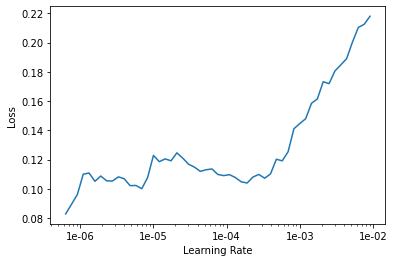

In [13]:
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(10, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,auroc,time
0,1.196107,0.745846,0.355769,0.710585,01:19
1,0.875082,0.582315,0.246795,0.882106,01:20
2,0.653271,0.519112,0.192308,0.906498,01:20
3,0.597961,0.540398,0.182692,0.907068,01:22
4,0.514319,0.544791,0.177885,0.908646,01:24
5,0.491065,0.495798,0.157051,0.912864,01:25
6,0.465417,0.550139,0.173077,0.916360,01:25
7,0.483314,0.493758,0.150641,0.914979,01:25
8,0.480699,0.459818,0.139423,0.915023,01:26
9,0.460576,0.489412,0.152244,0.915527,01:26


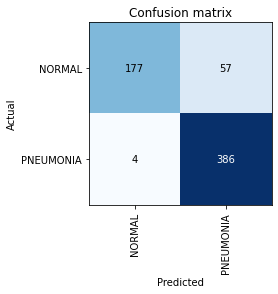

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [19]:
interp.most_confused()

[('NORMAL', 'PNEUMONIA', 57), ('PNEUMONIA', 'NORMAL', 4)]

In [32]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256